In [1]:
# pip install numpy, pandas, scikit-learn, matplotlib, yfinance

Import the necessary libraries:

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

Load historical stock price data into a Pandas DataFrame. We will be using the library yfinance to fetch stock data:

In [3]:
import yfinance as yf

# Replace 'AAPL' with the stock symbol you want to predict
stock_symbol = 'TSLA'

# Download historical stock data  yyyy-mm-dd
data = yf.download(stock_symbol, start='2023-05-01', end='2023-08-31')

# Extract the closing prices
df = data[['Close']].copy()


[*********************100%%**********************]  1 of 1 completed


Create features and target variable:

In [4]:
# Create a new column for the target variable (next day's closing price)
df['Target'] = df['Close'].shift(-1)

# Drop the last row with NaN target
df.dropna(inplace=True)

# Create a feature matrix (X) and target vector (y)
X = df[['Close']].values
y = df['Target'].values

Split the data into training and testing sets:

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Create and train a linear regression model:

In [6]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

Make predictions:

In [7]:
y_pred = model.predict(X_test)

Visualize the results:

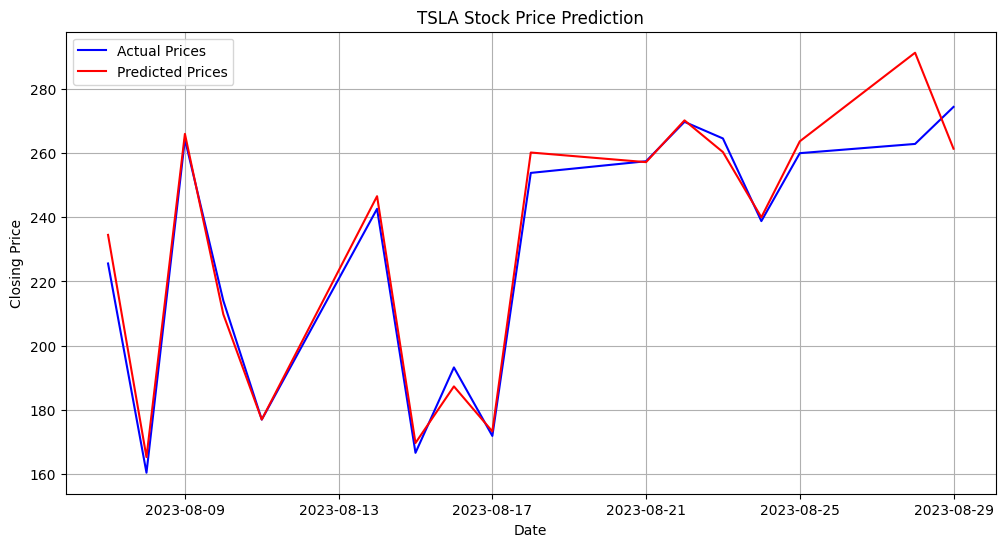

In [8]:
plt.figure(figsize=(12, 6))
plt.title(f'{stock_symbol} Stock Price Prediction')
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.plot(df.index[-len(y_test):], y_test, label='Actual Prices', color='b')
plt.plot(df.index[-len(y_test):], y_pred, label='Predicted Prices', color='r')
plt.legend()
plt.grid(True)
plt.show()